<a href="https://colab.research.google.com/github/Rachita-G/Python_Practice/blob/main/Models/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setting environment

In [1]:
# loading the required packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import math

In [2]:
# reading the data
url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
titanic = pd.read_csv(url)
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Performing EDA

In [3]:
# removing some columns not needed in EDA
titanic.drop(["Name", "Ticket"], axis =1, inplace =True)
titanic.tail()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
886,887,0,2,male,27.0,0,0,13.00,NaN,S
887,888,1,1,female,19.0,0,0,30.00,B42,S
888,889,0,3,female,NaN,1,2,23.45,NaN,S
889,890,1,1,male,26.0,0,0,30.00,C148,C
890,891,0,3,male,32.0,0,0,7.75,NaN,Q


In [4]:
# information about the data
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Cabin        204 non-null    object 
 9   Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(3)
memory usage: 69.7+ KB


In [5]:
# structure of the data
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
# shape of the data
titanic.shape

(891, 10)

In [7]:
# number of records in the dataset
len(titanic)

891

In [8]:
# height* width of the data
titanic.size

8910

In [9]:
# column names of the data
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [10]:
# freuqency ditribution of a category variable
titanic['Survived'].value_counts() 

0    549
1    342
Name: Survived, dtype: int64

In [11]:
 # idxmax() would return the category having highest frequency value
 titanic['Survived'].value_counts().idxmax()     

0

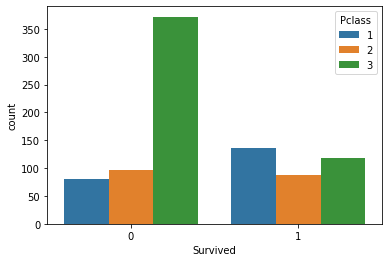

In [12]:
# frequency distribution in a graph
sns.countplot(x = "Survived", hue = 'Pclass', data = titanic)

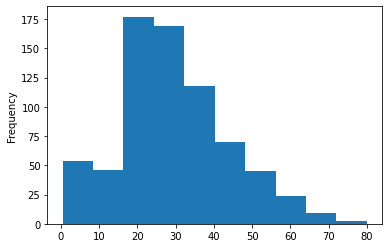

In [13]:
# default histogram
titanic["Age"].plot.hist() 

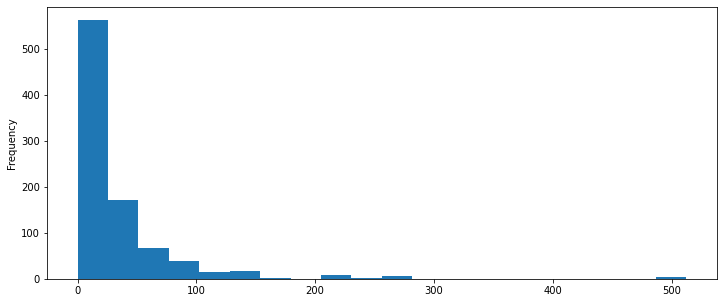

In [14]:
# with dynamic bin values and figure size
titanic["Fare"].plot.hist(bins = 20, figsize = (12, 5))

In [15]:
# identifying missing data
titanic.isnull().sum() # or .isnotnull() for contrary!

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Cabin          687
Embarked         2
dtype: int64

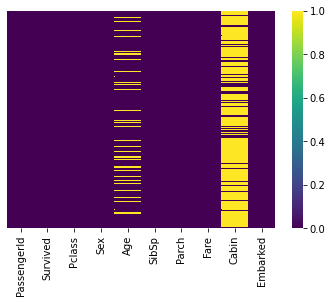

In [16]:
# plotting missing values in a heatmap for visualization purpose
sns.heatmap(titanic.isnull(), yticklabels=False, cmap ="viridis")

# Data Processing

**Dealing with missing data**
    
    1. Drop data 
        a. drop the whole row  - if more than 50% data is missing
        b. drop the whole column - if more than 50% data is missing
        
    2. Replace data
        a. replace it by mean
        b. replace it by frequency
        c. replace it based on other functions

In [17]:
# dropping whole column as >50% of data is missing in this variable
titanic.drop(["Cabin"], axis =1 , inplace = True) 

In [18]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
dtype: int64

In [19]:
# dropping records from the remianing data where Age and Embarked values are null
titanic.dropna(inplace = True) 

In [20]:
titanic.isnull().sum().sum()

0

In Pandas, we use 
<div>**.dtypes()** or >**.info()** to check the data type</div>
<div>**.astype()** to change the data type</div>

In [21]:
titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Sex             object
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Embarked        object
dtype: object

In [22]:
# converting the data types to a particular format
titanic[["Pclass", "Survived"]] = titanic[["Pclass", "Survived"]].astype("int")
titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Sex             object
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Embarked        object
dtype: object

**Example**

We see the column **"sex"** has two unique values, **"male" or "female"**.  similarly we will do it for **embarked variable** 

Regression doesn't understand words, only numbers. 

To use this attribute in regression analysis, we convert **"sex" and "embarked" into indicator variables.**

In [23]:
sex = pd.get_dummies(titanic["Sex"], drop_first = True)
sex.rename(columns={'male':'Male'}, inplace=True)
sex.head()

,Male
0,1
1,0
2,0
3,0
4,1


In [24]:
embarked = pd.get_dummies(titanic["Embarked"], drop_first = True)
embarked.rename(columns={'Q':'embarked_Q','S':'embarked_S'}, inplace=True)
embarked.head()

,embarked_Q,embarked_S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [25]:
pclass = pd.get_dummies(titanic["Pclass"], drop_first = True)
pclass.rename(columns = {2: 'Pclass_2', 3: 'Pclass_3'}, inplace = True)
pclass.head()

,Pclass_2,Pclass_3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1


In [26]:
# combining the above datasets into main titanic data
titanic = pd.concat([titanic, sex, embarked, pclass], axis=1)   # merge data frame "titanic" and "dummy variables" 
titanic.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Male,embarked_Q,embarked_S,Pclass_2,Pclass_3
0,1,0,3,male,22.0,1,0,7.2500,S,1,0,1,0,1
1,2,1,1,female,38.0,1,0,71.2833,C,0,0,0,0,0
2,3,1,3,female,26.0,0,0,7.9250,S,0,0,1,0,1
3,4,1,1,female,35.0,1,0,53.1000,S,0,0,1,0,0
4,5,0,3,male,35.0,0,0,8.0500,S,1,0,1,0,1


In [27]:
# drop original column "sex", "embarked" and "pclass" from "titanic dataset"
titanic.drop(["Sex", "Embarked", "Pclass"], axis = 1, inplace=True)
titanic.head()

,PassengerId,Survived,Age,SibSp,Parch,Fare,Male,embarked_Q,embarked_S,Pclass_2,Pclass_3
0,1,0,22.0,1,0,7.2500,1,0,1,0,1
1,2,1,38.0,1,0,71.2833,0,0,0,0,0
2,3,1,26.0,0,0,7.9250,0,0,1,0,1
3,4,1,35.0,1,0,53.1000,0,0,1,0,0
4,5,0,35.0,0,0,8.0500,1,0,1,0,1


# Performing Logistic Regression

In [29]:
# seperating dependent and independet variable
x = titanic.drop("Survived", axis=1)
y = titanic["Survived"]
x.head()

,PassengerId,Age,SibSp,Parch,Fare,Male,embarked_Q,embarked_S,Pclass_2,Pclass_3
0,1,22.0,1,0,7.2500,1,0,1,0,1
1,2,38.0,1,0,71.2833,0,0,0,0,0
2,3,26.0,0,0,7.9250,0,0,1,0,1
3,4,35.0,1,0,53.1000,0,0,1,0,0
4,5,35.0,0,0,8.0500,1,0,1,0,1


In [30]:
# divide into test and train dataset
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((569, 10), (143, 10), (569,), (143,))

In [35]:
# trainig the nodel
from sklearn.linear_model import LogisticRegression
lg_model = LogisticRegression(max_iter = 1000)
lg_model

LogisticRegression(max_iter=1000)

In [36]:
lg_model.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

In [47]:
# model prediction
y_predict = lg_model.predict(x_test)
y_predict = y_predict.reshape(-1, 1)

In [49]:
# prediction on the test set score
lg_model.score(x_test, y_test)

0.8251748251748252

# Model Accuracy

In [50]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [51]:
# confusion matrix
conf = confusion_matrix(y_predict, y_test)
print(conf)

[[74 17]
 [ 8 44]]


In [52]:
# classification report
clas = classification_report(y_predict, y_test)
print(clas)

              precision    recall  f1-score   support

           0       0.90      0.81      0.86        91
           1       0.72      0.85      0.78        52

    accuracy                           0.83       143
   macro avg       0.81      0.83      0.82       143
weighted avg       0.84      0.83      0.83       143



In [53]:
model_accuracy = accuracy_score(y_predict, y_test)
print(model_accuracy)

0.8251748251748252


# Feature Selection

### SelectFromModel

* In all feature selection procedures, it is a good practice to select the features by examining only the training set. This is to avoid overfitting.

* So considering we have a train and a test dataset. We select the features from the train set and then transfer the changes to the test set later.

In [54]:
from sklearn.feature_selection import SelectFromModel

# Create a selector object that will use the random forest classifier to identify
sfm = SelectFromModel(lg_model)

# Train the selector
sfm.fit(x_train, y_train)

SelectFromModel(estimator=LogisticRegression(max_iter=1000))

**SelectFromModel** will select those features which importance is greater than the mean importance of all the features by default, but we can alter this threshold if we want.

In [55]:
sfm.get_support()

array([False, False, False, False, False,  True, False, False,  True,
        True])

To see which features are important we can use **get_support** method on the fitted model.

It will return an array of boolean values: 
True for the features whose importance is greater than the mean importance and False for the rest.

In [56]:
# Print the names of the most important features
for feature_list_index in sfm.get_support(indices=True):
    print(titanic.columns[feature_list_index])

Fare
embarked_S
Pclass_2


## RFE - Recursive Feature Elimination

The **Recursive Feature Elimination (RFE)** method is a feature selection approach. 

It works by recursively removing attributes and building a model on those attributes that remain. 

It uses the model accuracy to identify which attributes (and combination of attributes) contribute the most to predicting the target attribute.

This recipe shows the use of RFE on the dataset to select 3 attributes.

In [65]:
# from sklearn.feature_selection import RFE

# #create the RFE model and select 5 attributes

# rfe = RFE(lg_model, 5)
# rfe = rfe.fit(x_train, y_train)

# print(rfe.support_)
# print(rfe.ranking_)